In [206]:
# football analysis based on kaggle data from 2022 and 2023
# still in development 
# Tiago Russomanno

# libraries to import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [208]:
df = pd.read_csv('2022-2023 Football Player Stats.csv',sep=';', encoding='latin-1')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [209]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


In [210]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


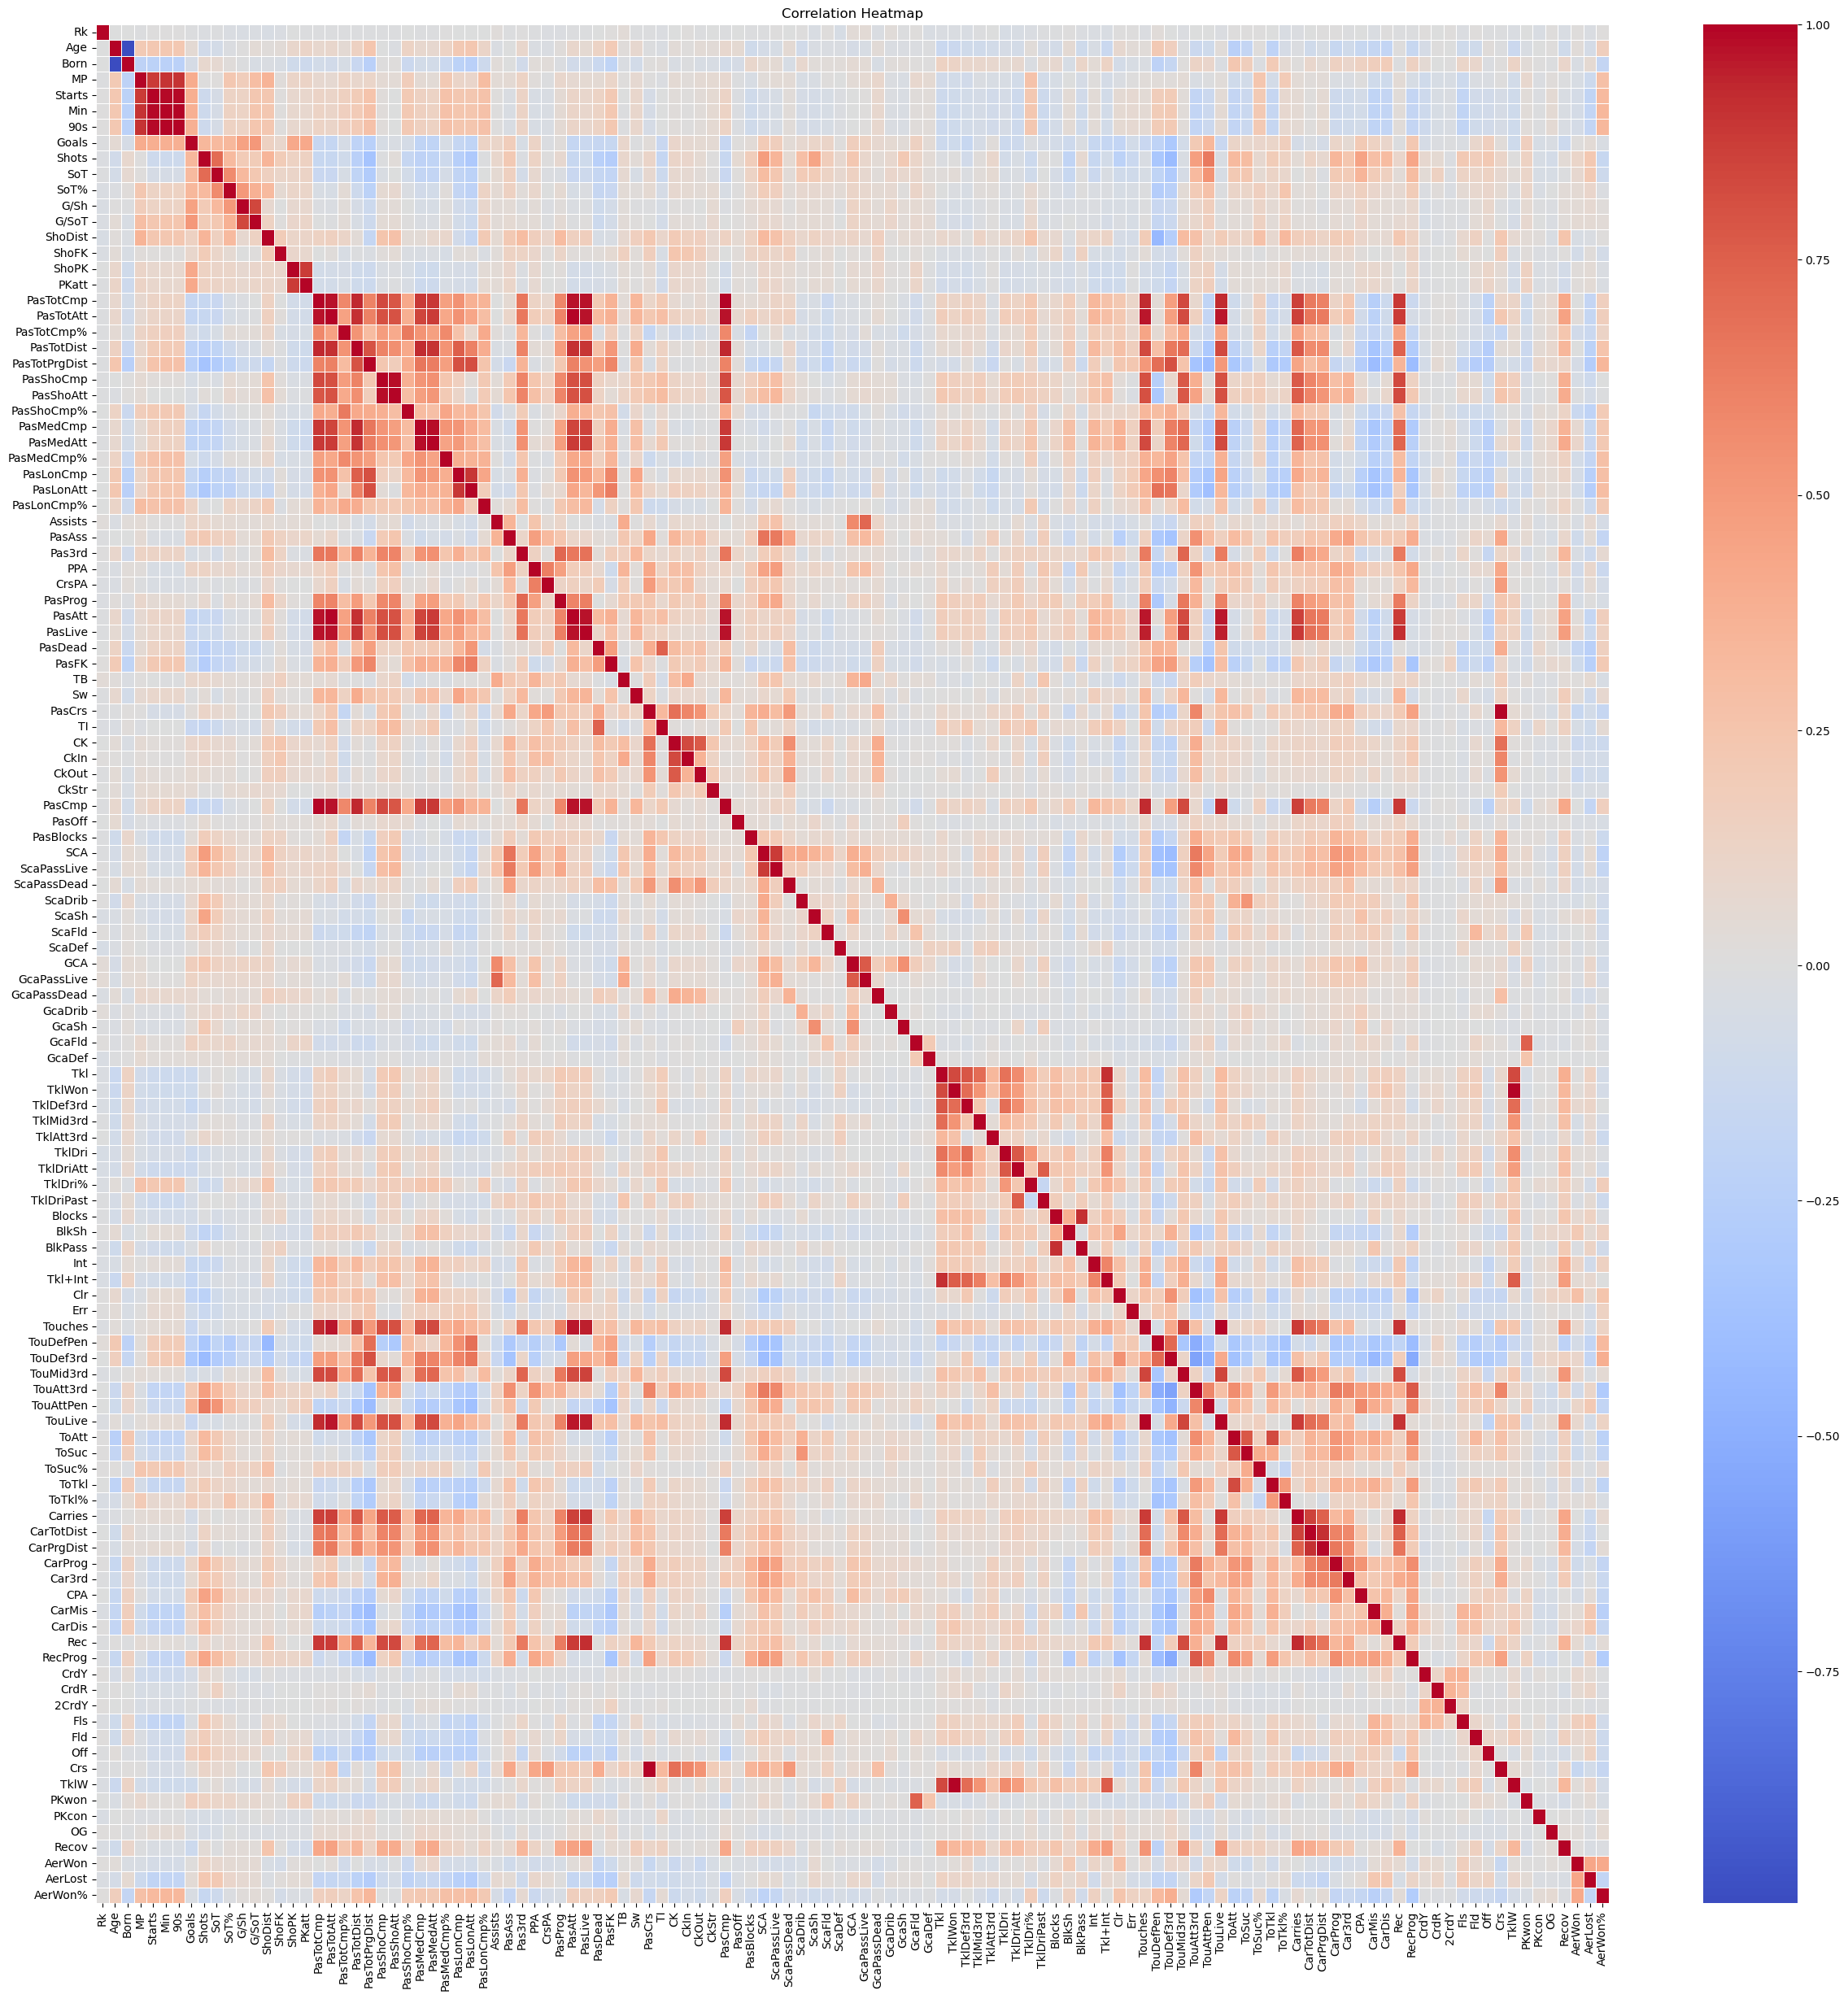

In [215]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
champs =df['Comp'].value_counts()
champs

Comp
Ligue 1           565
La Liga           550
Serie A           544
Premier League    540
Bundesliga        490
Name: count, dtype: int64

Text(0.5, 0, 'leagues')

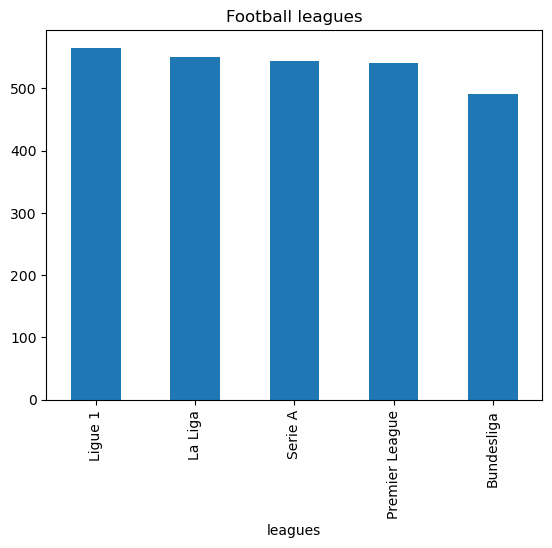

In [26]:
champs.plot(kind='bar')
plt.title( 'Football leagues')
plt.xlabel( 'leagues')

In [30]:
L1 = df.query('Comp == "Ligue 1"')
L1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.0,0.0,0.00,0.48,1.43,1.43,50.0


In [51]:
LA = df.query('Comp == "La Liga"')
SE = df.query('Comp == "Serie A"')
PL = df.query('Comp == "Premier League"')
BU = df.query('Comp == "Bundesliga"')

In [52]:
L1.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1263.440708,25.315044,1996.828319,12.042478,8.683186,777.688496,8.640885,1.093805,1.246743,0.450389,...,0.160779,1.730726,1.079717,0.014177,0.015416,0.003575,5.154761,1.290301,1.477487,44.288142
std,777.404489,4.584882,4.592305,7.346898,7.290124,622.263033,6.914073,2.180681,1.419961,0.833866,...,0.326785,2.261683,1.435267,0.059581,0.060468,0.027476,3.035165,1.530162,1.694722,27.017632
min,2.000000,16.000000,1983.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,593.000000,22.000000,1994.000000,5.000000,2.000000,180.000000,2.000000,0.000000,0.240000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.320000,0.480000,28.600000
50%,1251.000000,25.000000,1997.000000,13.000000,8.000000,681.000000,7.600000,0.000000,0.830000,0.170000,...,0.000000,0.850000,0.860000,0.000000,0.000000,0.000000,5.030000,0.860000,1.050000,47.400000
75%,1916.000000,29.000000,2000.000000,19.000000,16.000000,1342.000000,14.900000,1.000000,1.920000,0.670000,...,0.190000,2.500000,1.430000,0.000000,0.000000,0.000000,6.530000,1.700000,1.790000,60.000000
max,2671.000000,39.000000,2006.000000,23.000000,23.000000,2070.000000,23.000000,14.000000,10.000000,10.000000,...,3.330000,13.300000,20.000000,0.830000,0.910000,0.500000,30.000000,10.000000,15.000000,100.000000


In [39]:
top_scores_L1 = L1.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_L1.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
252,Wissam Ben Yedder,FRA,FW,Monaco,Ligue 1,32,14,2.46,1.59,15.7,76.3
184,Folarin Balogun,ENG,FW,Reims,Ligue 1,21,14,3.33,1.58,15.2,65.3
1358,Alexandre Lacazette,FRA,FW,Lyon,Ligue 1,31,13,2.85,1.40,14.9,70.0
1609,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,24,13,4.42,2.21,16.2,79.9
1687,Terem Moffi,NGA,FW,Lorient,Ligue 1,23,12,2.14,1.17,13.6,74.0
605,Jonathan David,CAN,FW,Lille,Ligue 1,23,12,3.13,1.38,14.9,82.1
788,Breel Embolo,SUI,FW,Monaco,Ligue 1,25,12,1.99,0.99,11.0,68.6
1780,Neymar,BRA,MFFW,Paris S-G,Ligue 1,31,12,2.05,1.02,17.0,80.1
669,Habib Diallo,SEN,FW,Strasbourg,Ligue 1,27,10,2.22,0.99,13.2,68.3
1650,Lionel Messi,ARG,MFFW,Paris S-G,Ligue 1,35,10,4.57,1.94,17.8,80.1


In [53]:
top_scores_LA = LA.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_LA.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
1426,Robert Lewandowski,POL,FW,Barcelona,La Liga,34,14,4.32,2.23,12.8,76.5
1221,Joselu,ESP,FW,Espanyol,La Liga,32,11,2.42,1.00,16.2,60.5
260,Karim Benzema,FRA,FW,Real Madrid,La Liga,35,9,4.05,1.38,16.2,85.4
134,Iago Aspas,ESP,FW,Celta Vigo,La Liga,35,9,2.27,1.03,19.1,77.2
1155,Borja Iglesias,ESP,FW,Betis,La Liga,30,9,2.38,0.85,15.4,74.0
2386,Alexander Sørloth,NOR,FW,Real Sociedad,La Liga,27,8,2.39,1.27,12.8,70.0
1744,Vedat Muriqi,KVX,FW,Mallorca,La Liga,28,8,2.34,0.82,16.3,57.4
2187,Oihan Sancet,ESP,MF,Athletic Club,La Liga,22,8,2.04,0.70,18.0,83.0
1634,Brais Méndez,ESP,MF,Real Sociedad,La Liga,26,7,2.36,0.93,20.3,79.8
1233,Vinicius Júnior,BRA,FW,Real Madrid,La Liga,22,7,2.51,1.23,16.4,77.6


In [54]:
top_scores_SE = SE.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_SE.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
1858,Victor Osimhen,NGA,FW,Napoli,Serie A,24,16,4.42,1.79,11.7,71.1
1575,Lautaro Martínez,ARG,FW,Inter,Serie A,25,12,3.92,1.51,14.8,72.4
1455,Ademola Lookman,NGA,FWMF,Atalanta,Serie A,25,12,2.64,1.04,16.0,76.1
1814,M'Bala Nzola,ANG,FW,Spezia,Serie A,26,9,2.26,0.85,15.6,78.9
120,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33,8,1.59,0.76,15.7,70.6
662,Boulaye Dia,SEN,FW,Salernitana,Serie A,26,8,1.53,0.80,14.5,75.9
2642,Mattia Zaccagni,ITA,FWMF,Lazio,Serie A,27,8,2.12,0.89,16.8,79.4
756,Paulo Dybala,ARG,MFFW,Roma,Serie A,29,8,2.82,0.99,18.7,77.8
2567,Duan Vlahovi?,SRB,FW,Juventus,Serie A,23,8,3.30,1.13,15.7,71.1
1348,Khvicha Kvaratskhelia,GEO,FW,Napoli,Serie A,22,8,3.43,1.39,17.9,77.6


In [55]:
top_scores_PL = PL.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_PL.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
1057,Erling Haaland,NOR,FW,Manchester City,Premier League,22,25,3.85,1.98,12.6,73.7
1260,Harry Kane,ENG,FW,Tottenham,Premier League,29,17,3.55,1.58,15.5,69.4
2451,Ivan Toney,ENG,FW,Brentford,Premier League,26,14,2.76,1.01,14.5,58.7
1680,Aleksandar Mitrovi?,SRB,FW,Fulham,Premier League,28,11,4.20,1.33,15.1,60.4
2045,Marcus Rashford,ENG,FW,Manchester Utd,Premier League,25,11,3.02,1.31,15.9,75.3
2099,Rodrigo,ESP,FWMF,Leeds United,Premier League,31,10,3.61,1.32,16.4,70.3
72,Miguel Almirón,PAR,FW,Newcastle Utd,Premier League,29,10,2.33,0.74,16.8,82.5
1494,James Maddison,ENG,MFFW,Leicester City,Premier League,26,9,3.19,1.06,20.2,77.0
202,Harvey Barnes,ENG,MFFW,Leicester City,Premier League,25,8,2.50,1.22,16.1,71.0
2686,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,8,2.73,0.86,18.9,79.1


In [56]:
top_scores_BU = BU.sort_values(by = 'Goals', ascending=False)[['Player','Nation','Pos','Squad','Comp','Age','Goals','Shots','SoT','ShoDist','PasTotCmp%']]
top_scores_BU.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Goals,Shots,SoT,ShoDist,PasTotCmp%
899,Niclas Füllkrug,GER,FW,Werder Bremen,Bundesliga,30,13,3.03,1.19,16.6,60.8
1797,Christopher Nkunku,FRA,FWMF,RB Leipzig,Bundesliga,25,12,2.89,1.20,15.8,80.6
1012,Vincenzo Grifo,ITA,FWMF,Freiburg,Bundesliga,29,11,2.17,0.91,22.9,74.1
2431,Marcus Thuram,FRA,FW,M'Gladbach,Bundesliga,25,10,3.41,1.73,13.0,73.1
1748,Jamal Musiala,GER,MFFW,Bayern Munich,Bundesliga,19,10,2.65,1.19,14.7,82.4
962,Serge Gnabry,GER,FWMF,Bayern Munich,Bundesliga,27,9,3.98,1.87,16.7,80.1
1308,Randal Kolo Muani,FRA,FW,Eint Frankfurt,Bundesliga,24,9,2.31,1.06,13.7,63.2
1845,Karim Onisiwo,AUT,FWMF,Mainz 05,Bundesliga,30,8,2.59,1.19,16.4,56.9
1252,Daichi Kamada,JPN,MFFW,Eint Frankfurt,Bundesliga,26,7,1.43,0.53,16.8,81.1
228,Sheraldo Becker,SUR,FW,Union Berlin,Bundesliga,28,7,2.10,0.93,20.0,57.7


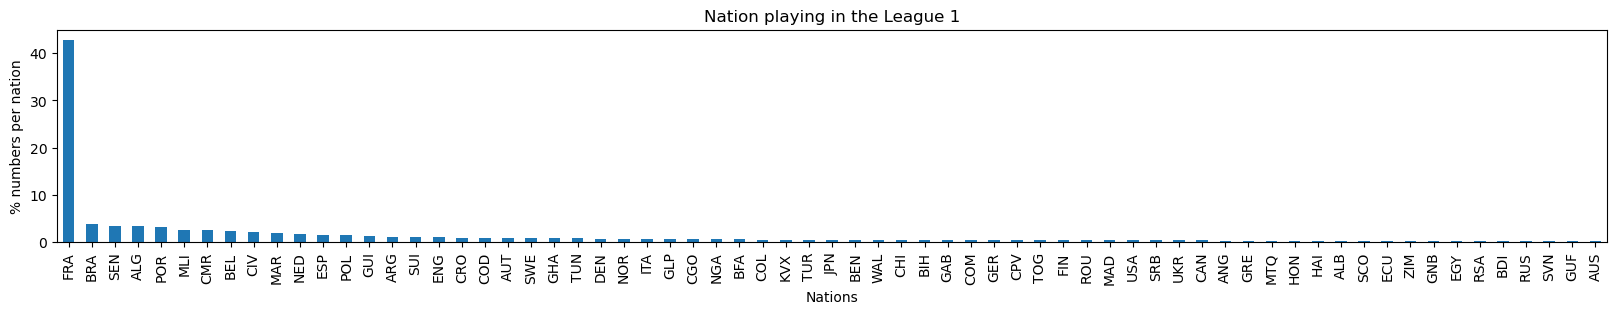

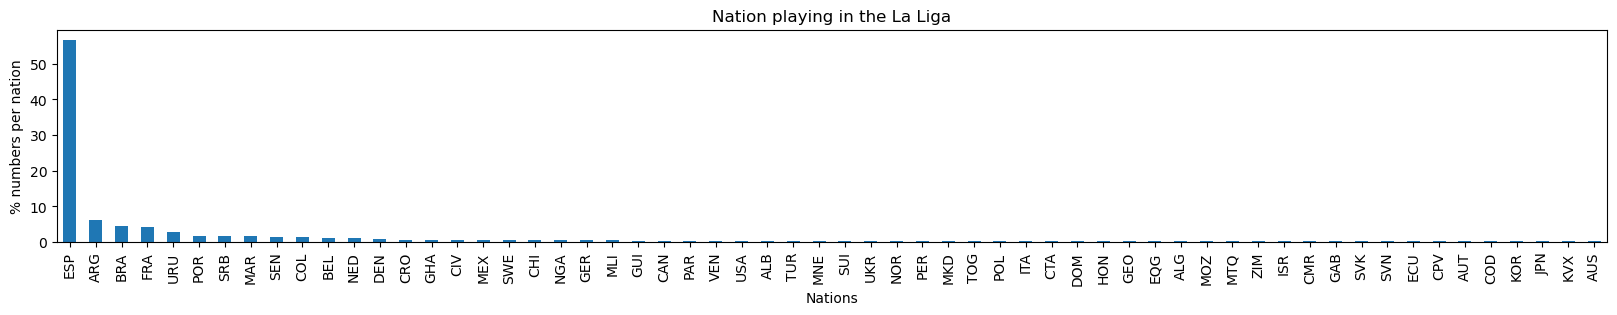

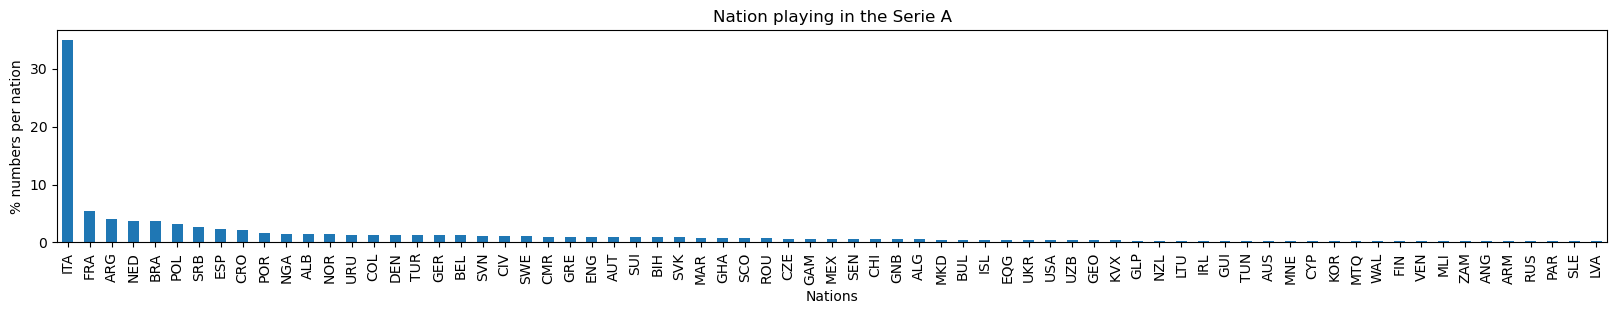

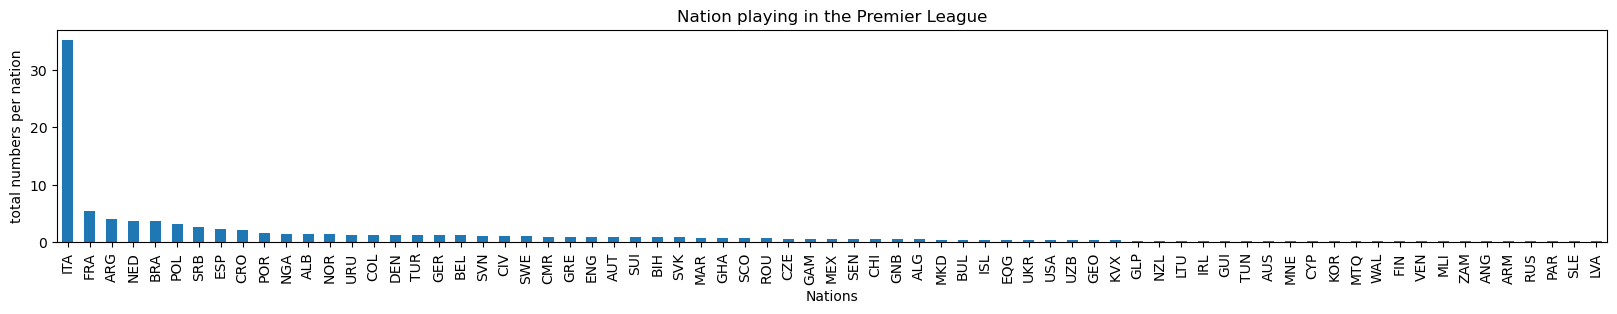

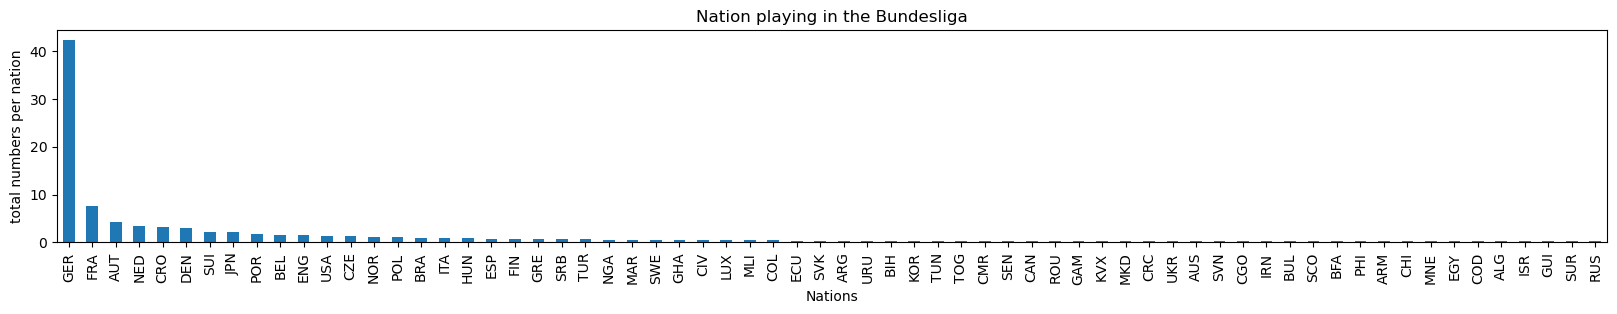

In [79]:
nations_l1 =top_scores_L1['Nation'].value_counts()
percentages_l1 = (nations_l1/ len(top_scores_L1))*100
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,1)
percentages_l1.plot(kind='bar')
plt.title( 'Nation playing in the League 1')
plt.xlabel( 'Nations')
plt.ylabel( '% numbers per nation')

nations_LA =top_scores_LA['Nation'].value_counts()
percentages_LA = (nations_LA/ len(top_scores_LA))*100
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,2)
percentages_LA.plot(kind='bar')
plt.title( 'Nation playing in the La Liga')
plt.xlabel( 'Nations')
plt.ylabel( '% numbers per nation')

nations_SE =top_scores_SE['Nation'].value_counts()
percentages_SE = (nations_SE/ len(top_scores_SE))*100
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,3)
percentages_SE.plot(kind='bar')
plt.title( 'Nation playing in the Serie A')
plt.xlabel( 'Nations')
plt.ylabel( '% numbers per nation')

nations_PL =top_scores_PL['Nation'].value_counts()
percentages_PL = (nations_SE/ len(top_scores_PL))*100
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,3)
percentages_PL.plot(kind='bar')
plt.title( 'Nation playing in the Premier League')
plt.xlabel( 'Nations')
plt.ylabel( 'total numbers per nation')

nations_BU =top_scores_BU['Nation'].value_counts()
percentages_BU = (nations_BU/ len(top_scores_BU))*100
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,3)
percentages_BU.plot(kind='bar')
plt.title( 'Nation playing in the Bundesliga')
plt.xlabel( 'Nations')
plt.ylabel( 'total numbers per nation')
plt.show()

In [125]:
# top teams per leagues
top_team_L1 = L1.groupby(['Squad'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_L1.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_L1.head(5)

,Squad,Total Goals
14,Paris S-G,54
10,Monaco,50
16,Rennes,40
9,Marseille,40
6,Lille,38


In [124]:
top_team_LA = LA.groupby(['Squad'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_LA.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_LA.head(5)

,Squad,Total Goals
3,Barcelona,42
14,Real Madrid,40
1,Athletic Club,30
2,Atlético Madrid,28
15,Real Sociedad,27


In [123]:
top_team_SE = SE.groupby(['Squad'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_SE.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_SE.head(5)

,Squad,Total Goals
12,Napoli,51
0,Atalanta,40
6,Inter,40
8,Lazio,36
10,Milan,36


In [122]:
top_team_PL = PL.groupby(['Squad'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_PL.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_PL.head(5)

,Squad,Total Goals
12,Manchester City,52
0,Arsenal,44
17,Tottenham,40
3,Brentford,35
4,Brighton,35


In [136]:
top_team_BU = BU.groupby(['Squad'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_BU.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_BU.head(3)

,Squad,Total Goals
1,Bayern Munich,58
4,Eint Frankfurt,40
12,RB Leipzig,40


In [150]:
top_team_BU = BU.groupby(['Squad','Player','Nation'])['Goals'].sum().reset_index().rename(columns={'Goals':'Total Goals'})
top_team_BU.sort_values(by='Total Goals', ascending = False, inplace = True)
top_team_BU.head(10)

,Squad,Player,Nation,Total Goals
459,Werder Bremen,Niclas Füllkrug,GER,13
329,RB Leipzig,Christopher Nkunku,FRA,12
161,Freiburg,Vincenzo Grifo,ITA,11
285,M'Gladbach,Marcus Thuram,FRA,10
40,Bayern Munich,Jamal Musiala,GER,10
56,Bayern Munich,Serge Gnabry,GER,9
136,Eint Frankfurt,Randal Kolo Muani,FRA,9
312,Mainz 05,Karim Onisiwo,AUT,8
38,Bayern Munich,Eric Maxim Choupo-Moting,CMR,7
263,Leverkusen,Moussa Diaby,FRA,7


Which players from which country had scored more goals in the Bundesliga

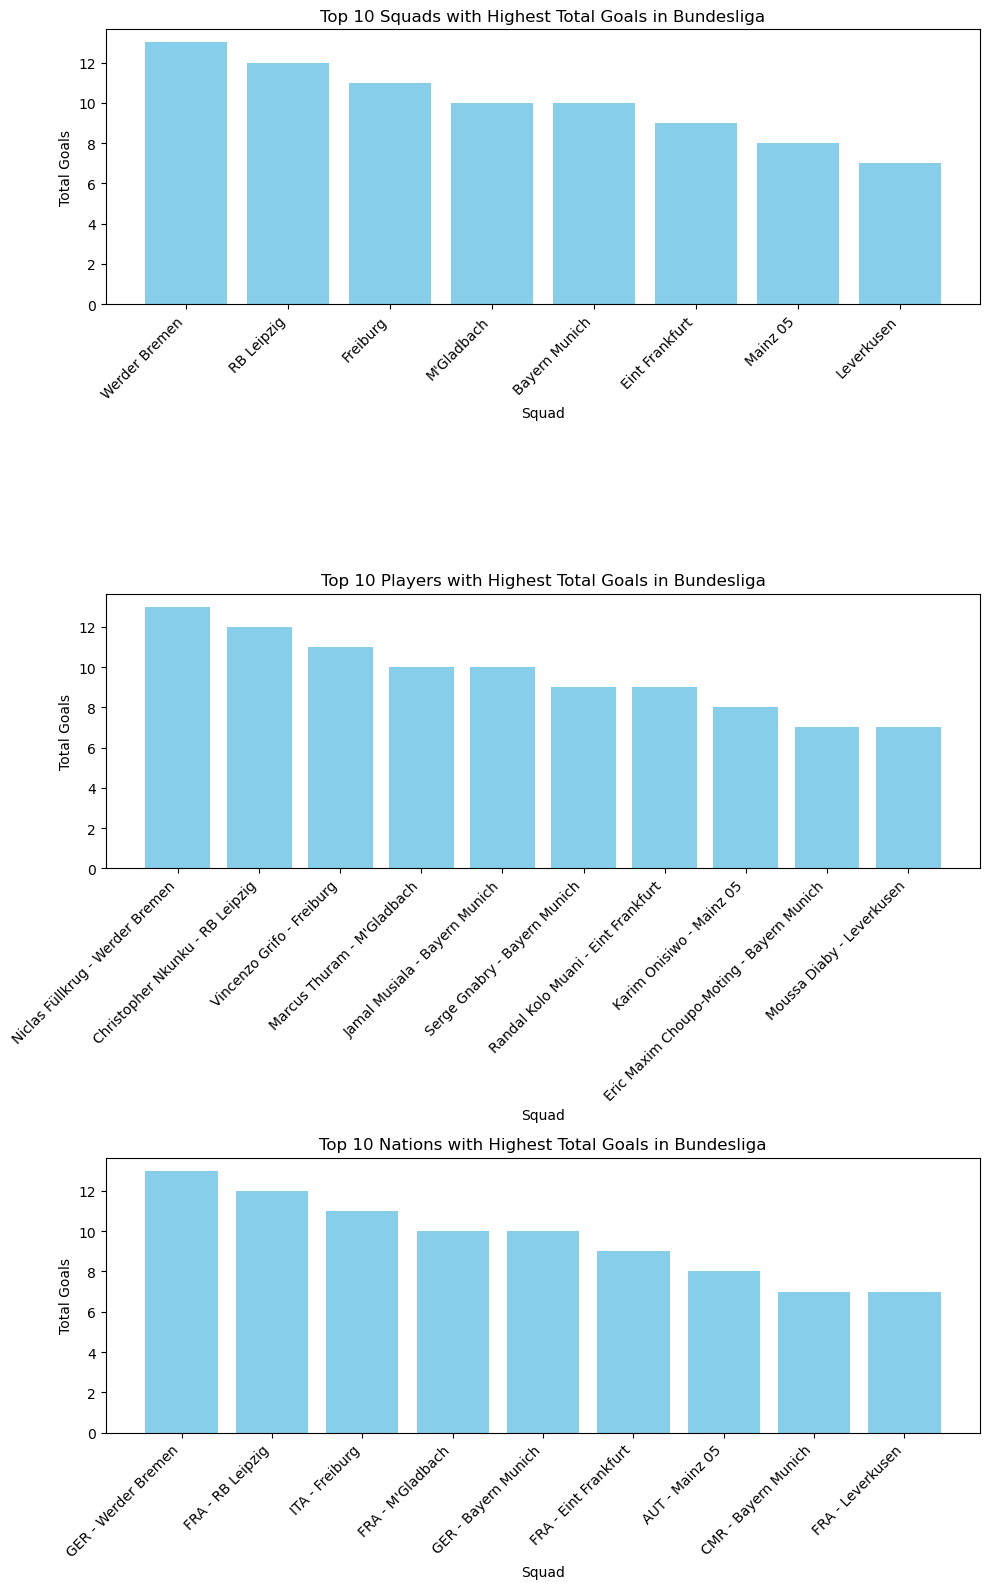

In [160]:
#  best strikes in Germany
BU_10= top_team_BU.head(10)

plt.figure(figsize=(10, 16))
plt.subplot(3,1,1)  # Adjust the figure size if needed
plt.bar(BU_10['Squad'], BU_10['Total Goals'], color='skyblue')

plt.xlabel('Squad')
plt.ylabel('Total Goals')
plt.title('Top 10 Squads with Highest Total Goals in Bundesliga')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.subplot(3,1,2)  # Adjust the figure size if needed
plt.bar(BU_10['Player'] + ' - ' + BU_10['Squad'],BU_10['Total Goals'], color='skyblue')

plt.xlabel('Squad')
plt.ylabel('Total Goals')
plt.title('Top 10 Players with Highest Total Goals in Bundesliga')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.subplot(3,1,3) 
plt.bar(BU_10['Nation'] + ' - ' + BU_10['Squad'],BU_10['Total Goals'], color='skyblue')

plt.xlabel('Squad')
plt.ylabel('Total Goals')
plt.title('Top 10 Nations with Highest Total Goals in Bundesliga')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [181]:
goals_min = BU[['Player','Squad','Nation','Goals','Min','Age']]

In [182]:
goals_min

,Player,Squad,Nation,Goals,Min,Age
16,Sargis Adamyan,Köln,ARM,1,471,29
19,Karim Adeyemi,Dortmund,GER,2,765,21
20,Amine Adli,Leverkusen,FRA,1,652,22
26,Felix Agu,Werder Bremen,GER,0,49,23
32,Naouirou Ahamada,Stuttgart,FRA,2,1398,20
...,...,...,...,...,...,...
2648,Rodrigo Zalazar,Schalke 04,URU,1,490,23
2663,Aaron Zehnter,Augsburg,GER,0,1,18
2666,Robin Zentner,Mainz 05,GER,0,1350,28
2668,Michael Zetterer,Werder Bremen,GER,0,62,27


In [204]:
import seaborn as sns
#numerical_columns = ['Goals', 'Min', 'Age']

# Calculate the correlation matrix
correlation_matrix = BU.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Sargis Adamyan'

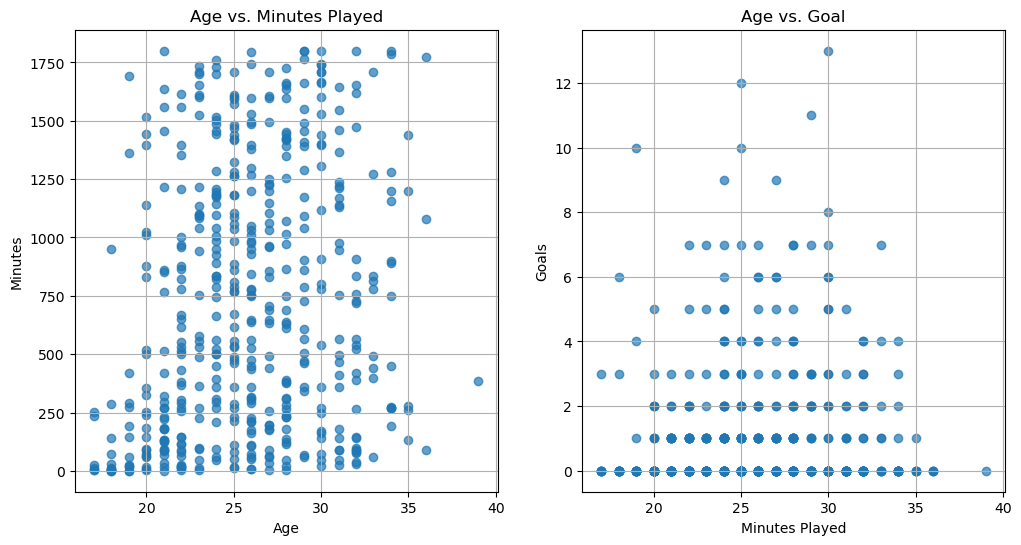

In [193]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(goals_min['Age'], goals_min['Min'], alpha=0.7)
plt.title('Age vs. Minutes Played')
plt.xlabel('Age')
plt.ylabel('Minutes')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(goals_min['Age'], goals_min['Goals'], alpha=0.7)
plt.title('Age vs. Goal')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

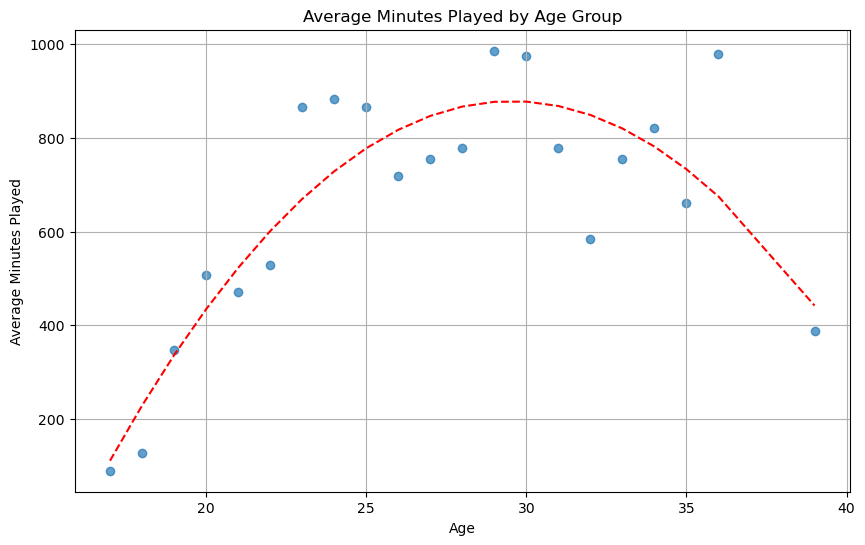

In [200]:
avg_age_mins = goals_min.groupby('Age')['Min'].mean().reset_index()

# Assigning x and y for the scatter plot
x = avg_age_mins['Age']
y = avg_age_mins['Min']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Average Minutes Played by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Minutes Played')
plt.grid(True)
#fitting a trendline
z= np.polyfit(x,y,2)
p= np.poly1d(z)

plt.plot(x,p(x),"r--")

plt.show()
plt.show()

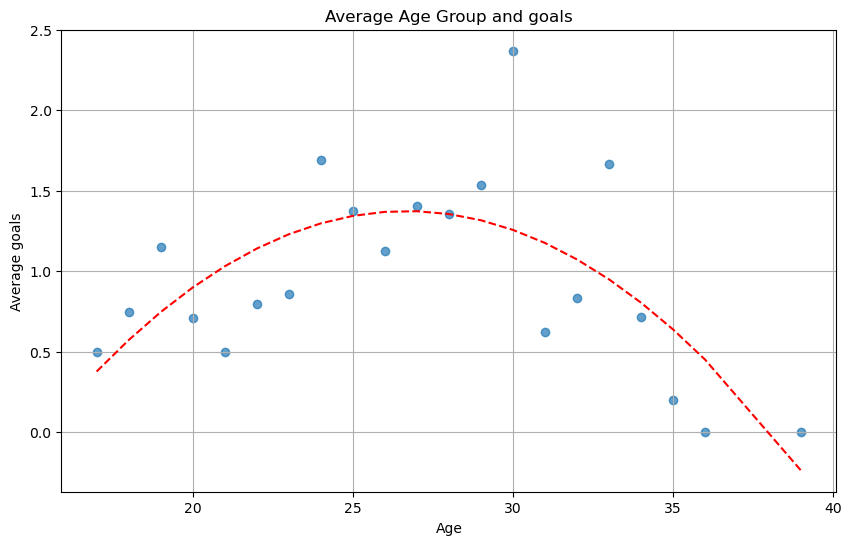

In [202]:
avg_age_mins = goals_min.groupby('Age')['Goals'].mean().reset_index()

# Assigning x and y for the scatter plot
x = avg_age_mins['Age']
y = avg_age_mins['Goals']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Average Age Group and goals')
plt.xlabel('Age')
plt.ylabel('Average goals')
plt.grid(True)
#fitting a trendline
z= np.polyfit(x,y,2)
p= np.poly1d(z)

plt.plot(x,p(x),"r--")

plt.show()
plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_3936\2297400394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_min['Goals_per_Total_Min'] = goals_min['Goals'] / goals_min['Min']
d:\anaconda2\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype

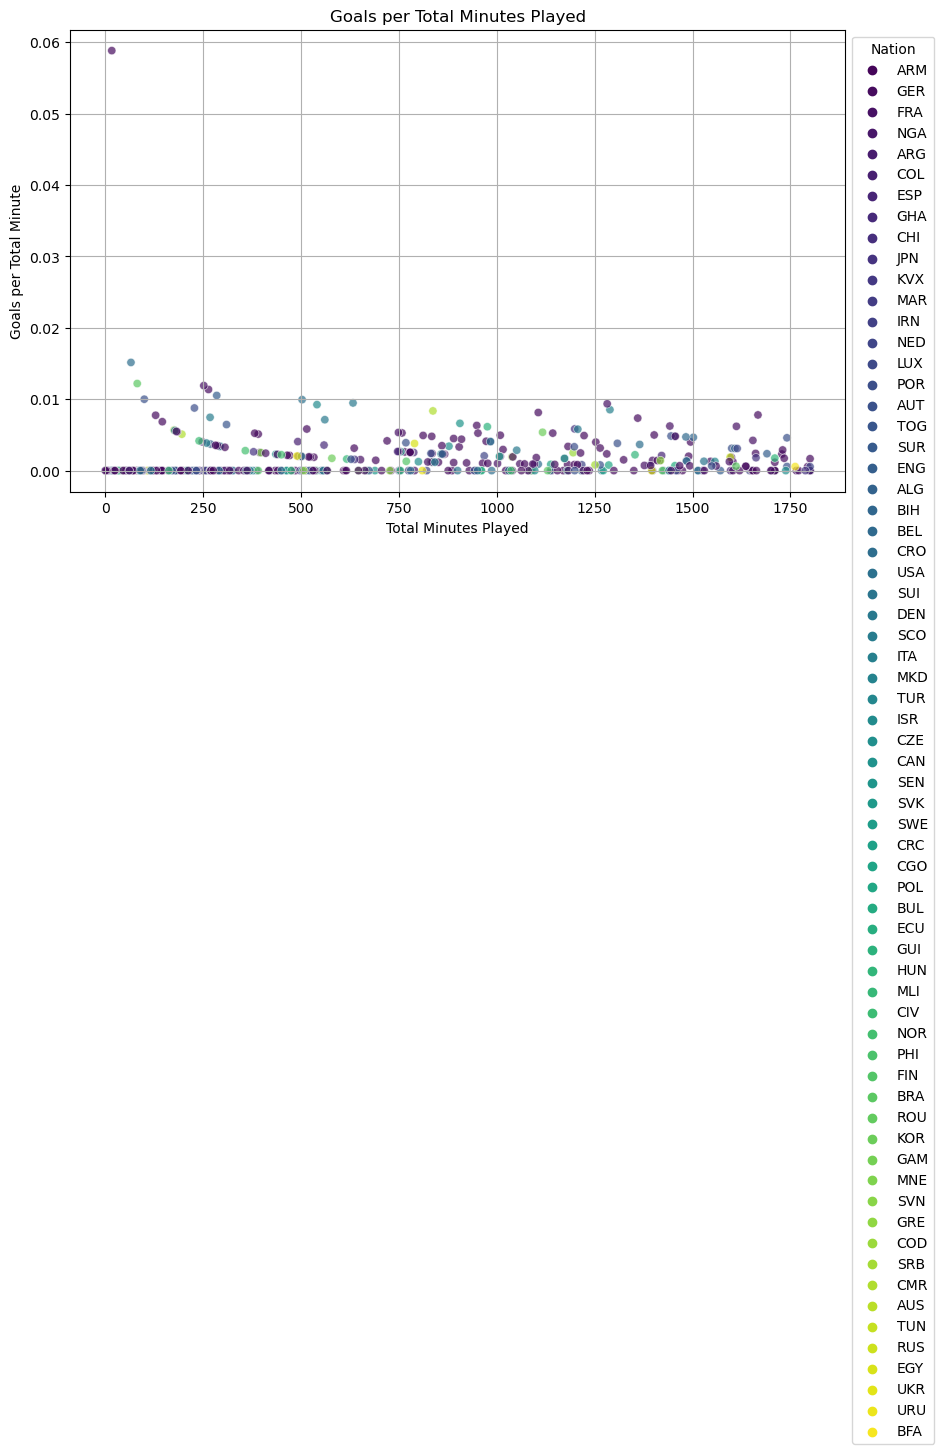

In [171]:
goals_min['Goals_per_Total_Min'] = goals_min['Goals'] / goals_min['Min']
import seaborn as sns 
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=goals_min, x='Min', y='Goals_per_Total_Min', hue='Nation', palette='viridis', alpha=0.7)
plt.title('Goals per Total Minutes Played')
plt.xlabel('Total Minutes Played')
plt.ylabel('Goals per Total Minute')
plt.grid(True)
plt.legend(title='Nation', bbox_to_anchor=(1, 1), loc='upper left')  # Optional, add legend
plt.show()

Exploring the number of Brazilian players in european leagues and their contributions 

In [99]:
# brazilian players per league

BR_players_L1 = top_scores_L1[top_scores_L1['Nation']== 'BRA']
BR_players_LA = top_scores_LA[top_scores_LA['Nation']== 'BRA']
BR_players_SE = top_scores_SE[top_scores_SE['Nation']== 'BRA']
BR_players_PL = top_scores_PL[top_scores_PL['Nation']== 'BRA']
BR_players_BU = top_scores_BU[top_scores_BU['Nation']== 'BRA']

BRA_data = [BR_players_L1, BR_players_LA, BR_players_SE, BR_players_PL,BR_players_BU]
BRA__names = ['Liga 1','La Liag','Serie 1', 'Premier League', 'Bundesliga']
combined_dataset = pd.concat(BRA_data, keys=BRA__names, names=['BRA_data'])


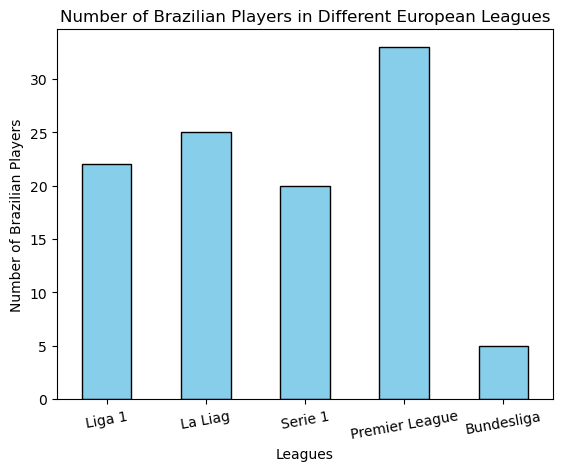

In [101]:
brazilian_players_count = pd.Series([len(BRA_data ) for BRA_data  in BRA_data ], index=BRA__names, name='Number of Brazilian Players')

# Plotting the bar chart
brazilian_players_count.plot(kind='bar', rot=10, color='skyblue', edgecolor='black')

plt.xlabel('Leagues')
plt.ylabel('Number of Brazilian Players')
plt.title('Number of Brazilian Players in Different European Leagues')

plt.show()

Text(0.5, 1.0, 'Boxplot Brazil')

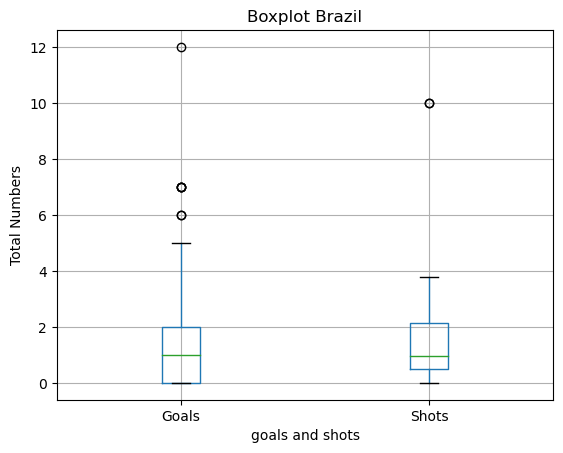

In [104]:
combined_dataset.boxplot(['Goals', 'Shots'])
plt.xlabel('goals and shots')
plt.ylabel('Total Numbers')
plt.title('Boxplot Brazil')

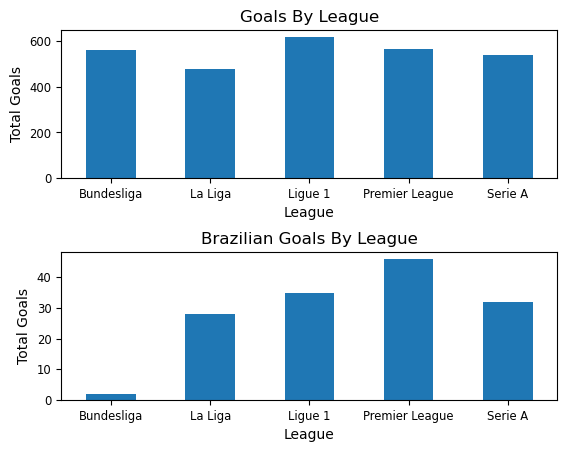

In [113]:
plt.subplot(2,1,1)
League_Goals = df.groupby(['Comp'])['Goals'].sum()

League_Goals.plot.bar(rot=0,title='Goals By League',xlabel='League',ylabel='Total Goals',fontsize='small')
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)

brazilian_goals_by_league = df[df['Nation'] == 'BRA'].groupby('Comp')['Goals'].sum()

brazilian_goals_by_league.plot.bar(rot=0, title='Brazilian Goals By League', xlabel='League', ylabel='Total Goals', fontsize='small')

plt.show()

General exploration 

In [ ]:
### TOP team per league


## need to improve the next steps 

<AxesSubplot:>

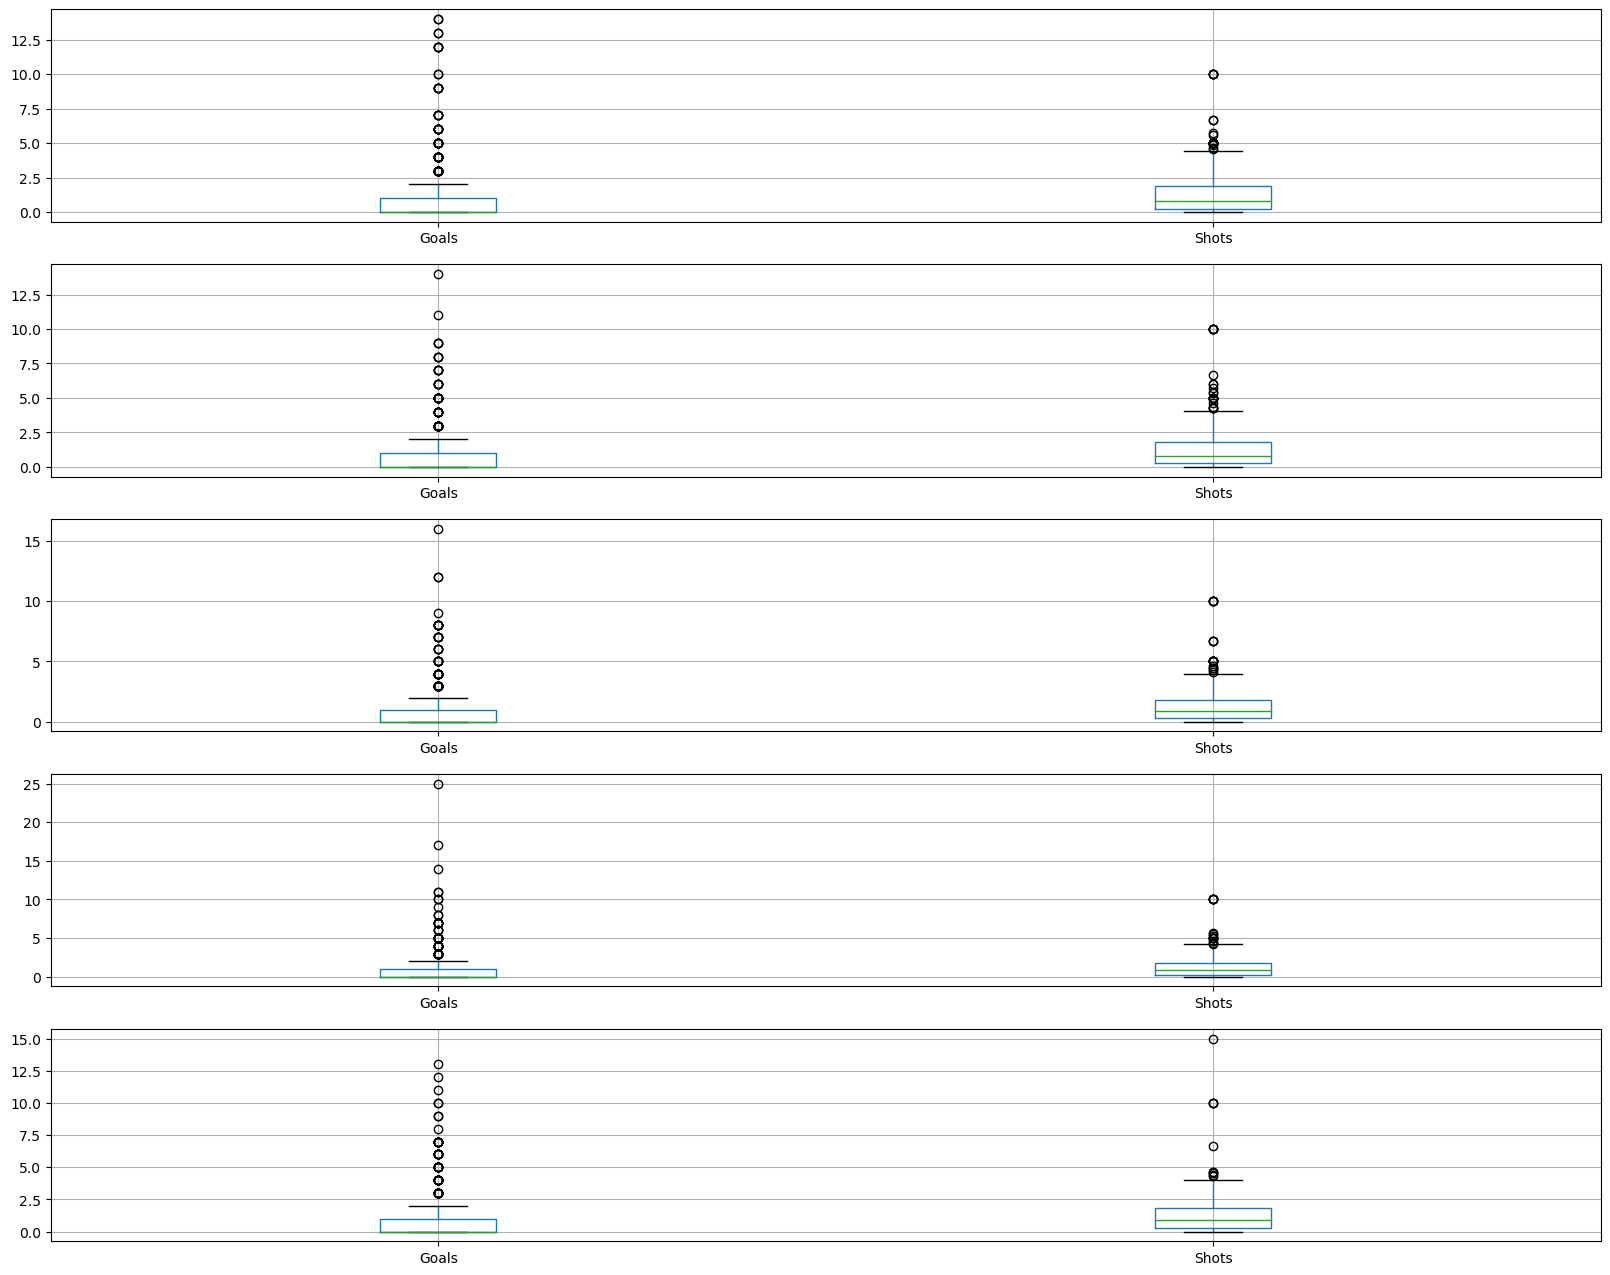

In [74]:
plt.subplots(figsize=(20, 16))
plt.subplot(5,1,1)
top_scores_L1.boxplot(['Goals', 'Shots'])
plt.subplot(5,1,2)
top_scores_LA.boxplot(['Goals', 'Shots'])
plt.subplot(5,1,3)
top_scores_SE.boxplot(['Goals', 'Shots'])
plt.subplot(5,1,4)
top_scores_PL.boxplot(['Goals', 'Shots'])
plt.subplot(5,1,5)
top_scores_BU.boxplot(['Goals', 'Shots'])